In [536]:
# Loading necessary libraries
library("tidyverse")
library("caret")
library(ggthemes)
library(gridExtra)
library(patchwork)

In [537]:
eu_deposits <- "EU_deposits_1yr_data.csv"
eu_inflation <- "EU_Inflation_HICP_data.csv"
# Check if our data have title row and what is the delimiter
read_lines(eu_deposits, n_max = 3)
read_lines(eu_inflation, n_max = 3)


[1] "Data Source in SDW: https://sdw.ecb.europa.eu/browse.do?node=9691394"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
[2] ",MIR.M.AT.B.L22.F.R.A.2250.EUR.N,MIR.M.BE.B.L22.F.R.A.2250.EUR.N,MIR.M.BG.B.L22.F.R.A.2250.BGN.N,MIR.M.CY.B.L22.F.R.A.2250.EUR.N,MIR.M.CZ.B.L22.F.R.A.2250.CZK.N,MIR.M.DE.B.L22.F.R.A.2250.EUR.N,MIR.M.DK.B.L22.F.R.A.2250.DKK.N,MIR.M.EE.B.L22.F.R.A.2250.EEK.N,MIR.M.EE.B.L22.F.R.A.2250.EUR.N,MIR.M.ES.B.L22.F.R.A.2250.EUR.N,MIR.M.FI.B.L22.F.R.A.2250.EUR.N,MIR.M.FR.B.L22.F.R.A.2250.EUR.N,MIR.M.GR.B.L22.F.R.A.2250.EUR.N,MIR.M.HR.B.L22.F.R.A.2250.HRK.N,MIR.M.HU.B.L22.F.R.A.2250.HUF.N,MIR.M.IE.B.L22.F.R.A.2250.EUR.N,MIR.M.IT.B.L22.F.R.A.2250.EUR.N,MIR.M.LT.B.L22.F.R.A.2250.EUR.N,MIR.M.LT.B.L22.F.R.A.2250.LTL.N,MIR.M.LU.B.L22.F.R.A.2250.EUR.N,MIR.M.LV.B.L22.F.R.A.2250.EUR.N,MIR.M.LV.B.L22.F.R.A.2250.LVL.N,MIR.M.MT.B.L22.F.R.A.2250.EUR.N,MIR.M.MT.B.L22.F.R.A.2250.MTL.N,MIR.M.NL.B.L22.F.R.A.2250.EUR.N,MIR.M.PL.B.L22.F.R.A.2250.PLN.N,MIR.M.PT.B.L22.F.R.A.2250.EUR.N,MIR.M.RO.B.L22.F.R.A.2250.RON.N,MIR.M.SE.B.L22.F.R.A.2250.SEK.N,MIR.M.SI.B.L22.F.R.A.2250.EUR.N,MIR.M.SI.B.L22.F.R.A.2250.SIT.N,MIR.M.SK.B.L22.F.R.A.2250.EUR.N,MIR.M.SK.B.L22.F.R.A.2250.SKK.N"
[3] ",\"Austria, Euro\",\"Belgium, Euro\",\"Bulgaria, Bulgarian lev\",\"Cyprus, Euro\",\"Czech Republic, Czech koruna\",\"Germany, Euro\",\"Denmark, Danish krone\",\"Estonia, Estonian kroon\",\"Estonia, Euro\",\"Spain, Euro\",\"Finland, Euro\",\"France, Euro\",\"Greece, Euro\",\"Croatia, Croatian kuna\",\"Hungary, Hungarian forint\",\"Ireland, Euro\",\"Italy, Euro\",\"Lithuania, Euro\",\"Lithuania, Lithuanian litas\",\"Luxembourg, Euro\",\"Latvia, Euro\",\"Latvia, Latvian lats\",\"Malta, Euro\",\"Malta, Maltese lira\",\"Netherlands, Euro\",\"Poland, Polish zloty\",\"Portugal, Euro\",\"Romania, Romanian leu\",\"Sweden, Swedish krona\",\"Slovenia, Euro\",\"Slovenia, Slovenian tolar\",\"Slovakia, Euro\",\"Slovakia, Slovak koruna\""

[1] "Data Source in SDW: https://sdw.ecb.europa.eu/browseChart.do?org.apache.struts.taglib.html.TOKEN=46c52daef2587d98a7880dbacfe169eb&df=true&ec=&dc=&oc=&pb=&rc=&DATASET=0&removeItem=&removedItemList=&mergeFilter=&activeTab=ICP&showHide=&REF_AREA.19=AT&REF_AREA.19=BE&REF_AREA.19=BG&REF_AREA.19=CY&REF_AREA.19=CZ&REF_AREA.19=D0&REF_AREA.19=DE&REF_AREA.19=DK&REF_AREA.19=EE&REF_AREA.19=ES&REF_AREA.19=FI&REF_AREA.19=FR&REF_AREA.19=GR&REF_AREA.19=HR&REF_AREA.19=HU&REF_AREA.19=IE&REF_AREA.19=IT&REF_AREA.19=LT&REF_AREA.19=LU&REF_AREA.19=LV&REF_AREA.19=MT&REF_AREA.19=NL&REF_AREA.19=PL&REF_AREA.19=PT&REF_AREA.19=RO&REF_AREA.19=SE&REF_AREA.19=SI&REF_AREA.19=SK&ICP_ITEM.19=000000&ICP_SUFFIX.19=ANR&MAX_DOWNLOAD_SERIES=500&SERIES_MAX_NUM=50&node=9691209&legendRef=reference&legendNor=&SERIES_KEY_checkall=on&SERIES_KEY=122.ICP.M.BG.N.000000.4.ANR&SERIES_KEY=122.ICP.M.CZ.N.000000.4.ANR&SERIES_KEY=122.ICP.M.DK.N.000000.4.ANR&SERIES_KEY=122.ICP.M.HR.N.000000.4.ANR&SERIES_KEY=122.ICP.M.HU.N.000000.4.ANR&SERIES_KEY=122.ICP.M.PL.N.000000.4.ANR&SERIES_KEY=122.ICP.M.RO.N.000000.4.ANR&SERIES_KEY=122.ICP.M.SE.N.000000.4.ANR&SERIES_KEY=122.ICP.M.AT.N.000000.4.ANR&SERIES_KEY=122.ICP.M.BE.N.000000.4.ANR&SERIES_KEY=122.ICP.M.CY.N.000000.4.ANR&SERIES_KEY=122.ICP.M.D0.N.000000.4.ANR&SERIES_KEY=122.ICP.M.DE.N.000000.4.ANR&SERIES_KEY=122.ICP.M.EE.N.000000.4.ANR&SERIES_KEY=122.ICP.M.ES.N.000000.4.ANR&SERIES_KEY=122.ICP.M.FI.N.000000.4.ANR&SERIES_KEY=122.ICP.M.FR.N.000000.4.ANR&SERIES_KEY=122.ICP.M.GR.N.000000.4.ANR&SERIES_KEY=122.ICP.M.IE.N.000000.4.ANR&SERIES_KEY=122.ICP.M.IT.N.000000.4.ANR&SERIES_KEY=122.ICP.M.LT.N.000000.4.ANR&SERIES_KEY=122.ICP.M.LU.N.000000.4.ANR&SERIES_KEY=122.ICP.M.LV.N.000000.4.ANR&SERIES_KEY=122.ICP.M.MT.N.000000.4.ANR&SERIES_KEY=122.ICP.M.NL.N.000000.4.ANR&SERIES_KEY=122.ICP.M.PT.N.000000.4.ANR&SERIES_KEY=122.ICP.M.SI.N.000000.4.ANR&SERIES_KEY=122.ICP.M.SK.N.000000.4.ANR"
[2] ",ICP.M.AT.N.000000.4.ANR,ICP.M.BE.N.000000.4.ANR,ICP.M.BG.N.000000.4.ANR,ICP.M.CY.N.000000.4.ANR,ICP.M.CZ.N.000000.4.ANR,ICP.M.D0.N.000000.4.ANR,ICP.M.DE.N.000000.4.ANR,ICP.M.DK.N.000000.4.ANR,ICP.M.EE.N.000000.4.ANR,ICP.M.ES.N.000000.4.ANR,ICP.M.FI.N.000000.4.ANR,ICP.M.FR.N.000000.4.ANR,ICP.M.GR.N.000000.4.ANR,ICP.M.HR.N.000000.4.ANR,ICP.M.HU.N.000000.4.ANR,ICP.M.IE.N.000000.4.ANR,ICP.M.IT.N.000000.4.ANR,ICP.M.LT.N.000000.4.ANR,ICP.M.LU.N.000000.4.ANR,ICP.M.LV.N.000000.4.ANR,ICP.M.MT.N.000000.4.ANR,ICP.M.NL.N.000000.4.ANR,ICP.M.PL.N.000000.4.ANR,ICP.M.PT.N.000000.4.ANR,ICP.M.RO.N.000000.4.ANR,ICP.M.SE.N.000000.4.ANR,ICP.M.SI.N.000000.4.ANR,ICP.M.SK.N.000000.4.ANR"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
[3] ",Austria,Belgium,Bulgaria,Cyprus,Czech Republic,EU (changing composition),Germany,Denmark,Estonia,Spain,Finland,France,Greece,Croatia,Hungary,Ireland,Italy,Lithuania,Luxembourg,Latvia,Malta,Netherlan

In [538]:
eu_deposits_data <- read_csv(eu_deposits, skip=2)
colnames(eu_deposits_data) <- make.names(colnames(eu_deposits_data))
colnames(eu_deposits_data)[1] <- "Date"
eu_inflation_data <- read_csv(eu_inflation, skip=2)
colnames(eu_inflation_data) <- make.names(colnames(eu_inflation_data))
colnames(eu_inflation_data)[1] <- "Date"

New names:
• `` -> `...1`
Rows: 515 Columns: 34
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (34): ...1, Austria, Euro, Belgium, Euro, Bulgaria, Bulgarian lev, Cypru...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `` -> `...1`
Rows: 420 Columns: 29
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (29): ...1, Austria, Belgium, Bulgaria, Cyprus, Czech Republic, EU (chan...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [539]:
eu_deposits_data <- eu_deposits_data[c(-1, -2), ]
head(eu_deposits_data)

Date,Austria..Euro,Belgium..Euro,Bulgaria..Bulgarian.lev,Cyprus..Euro,Czech.Republic..Czech.koruna,Germany..Euro,Denmark..Danish.krone,Estonia..Estonian.kroon,Estonia..Euro,⋯,Malta..Maltese.lira,Netherlands..Euro,Poland..Polish.zloty,Portugal..Euro,Romania..Romanian.leu,Sweden..Swedish.krona,Slovenia..Euro,Slovenia..Slovenian.tolar,Slovakia..Euro,Slovakia..Slovak.koruna
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2022Sep,0.80,0.84,0.12,0.11,6.10,0.84,1.15,NA,0.94,⋯,NA,1.84,5.44,0.05,6.44,1.65,0.11,NA,0.77,NA
2022Aug,0.37,0.37,0.11,0.06,5.98,0.49,0.25,NA,0.83,⋯,NA,1.53,5.22,0.07,6.22,1.21,0.04,NA,0.48,NA
2022Jul,0.23,0.11,0.09,0.05,5.95,0.31,-0.44,NA,0.59,⋯,NA,1.59,4.85,0.09,5.49,0.90,0.03,NA,0.21,NA
2022Jun,0.12,0.14,0.06,0.05,5.37,0.17,-0.45,NA,0.49,⋯,NA,1.47,4.50,0.07,4.37,0.53,0.03,NA,0.16,NA
2022May,0.08,0.07,0.04,0.05,4.53,0.14,-0.50,NA,0.50,⋯,NA,1.23,3.38,0.04,3.21,0.38,0.04,NA,0.21,NA
2022Apr,0.10,0.06,0.04,0.05,4.17,0.14,-0.51,NA,0.44,⋯,NA,1.15,2.03,0.04,2.56,0.32,0.03,NA,0.24,NA


In [540]:
eu_inflation_data <- eu_inflation_data[c(-1, -2), ]
head(eu_inflation_data)

Date,Austria,Belgium,Bulgaria,Cyprus,Czech.Republic,EU..changing.composition.,Germany,Denmark,Estonia,⋯,Luxembourg,Latvia,Malta,Netherlands,Poland,Portugal,Romania,Sweden,Slovenia,Slovakia
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2022Oct,11.5,13.1,NA,8.6,NA,NA,11.6,NA,22.4,⋯,8.8,21.8,7.5,16.8,NA,10.6,NA,NA,10.3,14.5
2022Sep,10.9,12.1,15.6,9.0,17.8,10.9,10.9,11.1,24.1,⋯,8.8,22.0,7.4,17.1,15.7,9.8,13.4,10.3,10.6,13.6
2022Aug,9.3,10.5,15.0,9.6,17.1,10.1,8.8,9.9,25.2,⋯,8.6,21.4,7.0,13.7,14.8,9.3,13.3,9.5,11.5,13.4
2022Jul,9.4,10.4,14.9,10.6,17.3,9.8,8.5,9.6,23.2,⋯,9.3,21.3,6.8,11.6,14.2,9.4,13.0,8.3,11.7,12.8
2022Jun,8.7,10.5,14.8,9.0,16.6,9.6,8.2,9.1,22.0,⋯,10.3,19.2,6.1,9.9,14.2,9.0,13.0,8.9,10.8,12.6
2022May,7.7,9.9,13.4,8.8,15.2,8.8,8.7,8.2,20.1,⋯,9.1,16.8,5.8,10.2,12.8,8.1,12.4,7.5,8.7,11.8


In [541]:
# converting wide data into tidy data
eu_deposits_data <- eu_deposits_data |> pivot_longer(-Date, names_to = "country", values_to = "deposits")
eu_inflation_data <- eu_inflation_data |> pivot_longer(-Date, names_to = "country", values_to = "inflation")

In [542]:
# Getting more information about the structure of data objects
str(eu_deposits_data)
str(eu_inflation_data)

tibble [16,929 × 3] (S3: tbl_df/tbl/data.frame)
 $ Date    : chr [1:16929] "2022Sep" "2022Sep" "2022Sep" "2022Sep" ...
 $ country : chr [1:16929] "Austria..Euro" "Belgium..Euro" "Bulgaria..Bulgarian.lev" "Cyprus..Euro" ...
 $ deposits: chr [1:16929] "0.80" "0.84" "0.12" "0.11" ...
tibble [11,704 × 3] (S3: tbl_df/tbl/data.frame)
 $ Date     : chr [1:11704] "2022Oct" "2022Oct" "2022Oct" "2022Oct" ...
 $ country  : chr [1:11704] "Austria" "Belgium" "Bulgaria" "Cyprus" ...
 $ inflation: chr [1:11704] "11.5" "13.1" NA "8.6" ...


In [543]:
head(eu_deposits_data)
head(eu_inflation_data)

Date,country,deposits
<chr>,<chr>,<chr>
2022Sep,Austria..Euro,0.80
2022Sep,Belgium..Euro,0.84
2022Sep,Bulgaria..Bulgarian.lev,0.12
2022Sep,Cyprus..Euro,0.11
2022Sep,Czech.Republic..Czech.koruna,6.10
2022Sep,Germany..Euro,0.84


Date,country,inflation
<chr>,<chr>,<chr>
2022Oct,Austria,11.5
2022Oct,Belgium,13.1
2022Oct,Bulgaria,NA
2022Oct,Cyprus,8.6
2022Oct,Czech.Republic,NA
2022Oct,EU..changing.composition.,NA


In [544]:
# Checking if columns of our data have any missing values
apply(eu_deposits_data, 2, function(col) sum(is.na(col)))
apply(eu_inflation_data, 2, function(col) sum(is.na(col)))

Date  country deposits 
       0        0    10080

Date   country inflation 
        0         0      2768

In [545]:
substring <- "Euro"
euro_zone <- eu_deposits_data[grepl(substring, eu_deposits_data$country, fixed=TRUE),]

In [546]:
head(euro_zone)

Date,country,deposits
<chr>,<chr>,<chr>
2022Sep,Austria..Euro,0.80
2022Sep,Belgium..Euro,0.84
2022Sep,Cyprus..Euro,0.11
2022Sep,Germany..Euro,0.84
2022Sep,Estonia..Euro,0.94
2022Sep,Spain..Euro,0.16


In [547]:
euro_zone <- substring(euro_zone$country, 1, nchar(euro_zone$country)-6)

In [548]:
euro_zone <- unique(euro_zone)
euro_zone

[1] "Austria"     "Belgium"     "Cyprus"      "Germany"     "Estonia"    
 [6] "Spain"       "Finland"     "France"      "Greece"      "Ireland"    
[11] "Italy"       "Lithuania"   "Luxembourg"  "Latvia"      "Malta"      
[16] "Netherlands" "Portugal"    "Slovenia"    "Slovakia"

In [549]:
eu_inflation <- eu_inflation_data %>% mutate(euro = as.factor(if_else(country %in% euro_zone, 1, 0)))
head(eu_inflation)

Date,country,inflation,euro
<chr>,<chr>,<chr>,<fct>
2022Oct,Austria,11.5,1
2022Oct,Belgium,13.1,1
2022Oct,Bulgaria,NA,0
2022Oct,Cyprus,8.6,1
2022Oct,Czech.Republic,NA,0
2022Oct,EU..changing.composition.,NA,0


In [550]:
eu_inflation <- eu_inflation|> mutate(country = as.factor(country))

In [551]:
pandemic <- "2020Mar"
year_pandemic <- "2021Mar"
attack_on_ukraine <- "2022Mar"
now <- "2022Sep"

In [552]:
#split data into time intervals
n = sum(eu_inflation$Date == pandemic)
pre_pandemic_inf<- eu_inflation[which(eu_inflation$Date == "2018Jan")[n]:which(eu_inflation$Date == pandemic)[1], ]
year_pandemic_inf <- eu_inflation[which(eu_inflation$Date == pandemic)[n]:which(eu_inflation$Date == year_pandemic)[1], ]
pre_attack_inf <- eu_inflation[which(eu_inflation$Date == year_pandemic)[n]:which(eu_inflation$Date == attack_on_ukraine)[1], ]
after_attack_inf <- eu_inflation[which(eu_inflation$Date == attack_on_ukraine)[n]:which(eu_inflation$Date == now)[1], ]

In [553]:
pre_pandemic_inf <- pre_pandemic_inf |> mutate(Date = factor(Date, levels = unique(Date)), inflation = as.numeric(inflation))
year_pandemic_inf <- year_pandemic_inf |> mutate(Date = factor(Date, levels = unique(Date)), inflation = as.numeric(inflation))
pre_attack_inf <- pre_attack_inf |> mutate(Date = factor(Date, levels = unique(Date)), inflation = as.numeric(inflation))
after_attack_inf <- after_attack_inf |> mutate(Date = factor(Date, levels = unique(Date)), inflation = as.numeric(inflation))

In [554]:
head(pre_pandemic_inf)

Date,country,inflation,euro
<fct>,<fct>,<dbl>,<fct>
2018Jan,Slovakia,2.6,1
2018Jan,Slovenia,1.7,1
2018Jan,Sweden,1.6,0
2018Jan,Romania,3.4,0
2018Jan,Portugal,1.1,1
2018Jan,Poland,1.6,0


In [555]:
a <- pre_pandemic_inf |> filter(euro == 0) |> summary()
a[,3]

"Min.   :0.300  " "1st Qu.:1.300  " "Median :2.000  " "Mean   :2.164  " 
                                                      
"3rd Qu.:3.000  " "Max.   :4.700  "                NA

In [556]:
a <- pre_pandemic_inf |> filter(euro == 1) |> summary()
a[,3]

"Min.   :-1.500  " "1st Qu.: 1.000  " "Median : 1.600  " "Mean   : 1.599  " 
                                                         
"3rd Qu.: 2.200  " "Max.   : 4.500  "                 NA

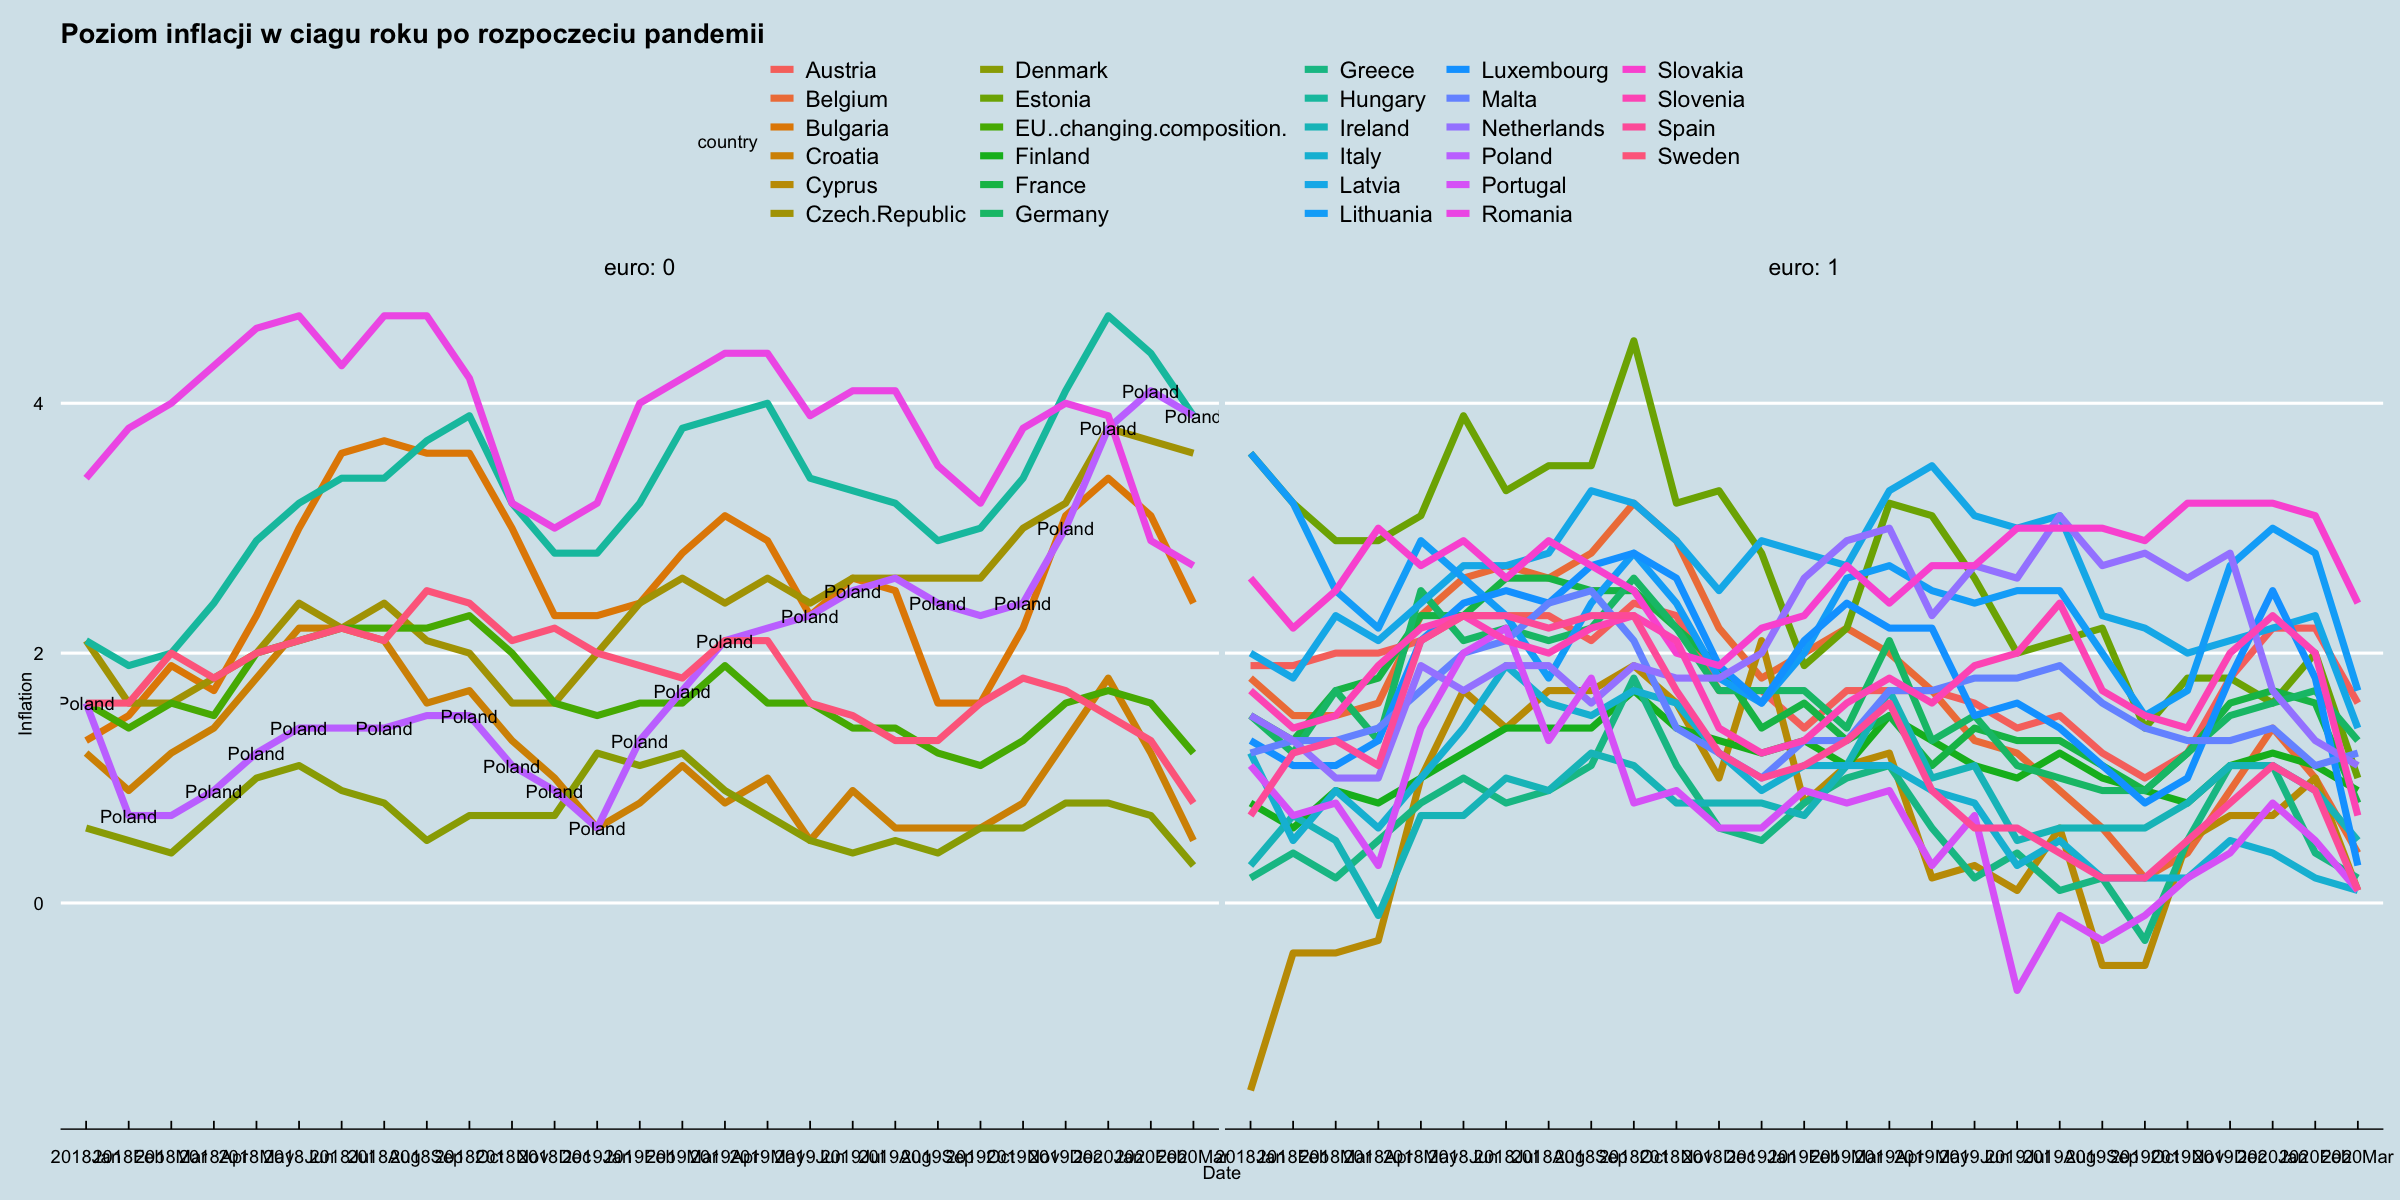

In [557]:
options(repr.plot.width=20, repr.plot.height=10)
pre_pandemic_inf |> 
ggplot(aes(Date,
           inflation,
           group = country)) + 
geom_line(aes(color = country), size=2) + geom_text(data=subset(pre_pandemic_inf,
                                                                country == "Poland"),
                                                    aes(label=country), check_overlap = TRUE) +
facet_grid(. ~ euro, labeller = label_both) +
xlab("Date") + ylab("Inflation") + 
ggtitle("Poziom inflacji w ciagu roku po rozpoczeciu pandemii") + theme_economist()

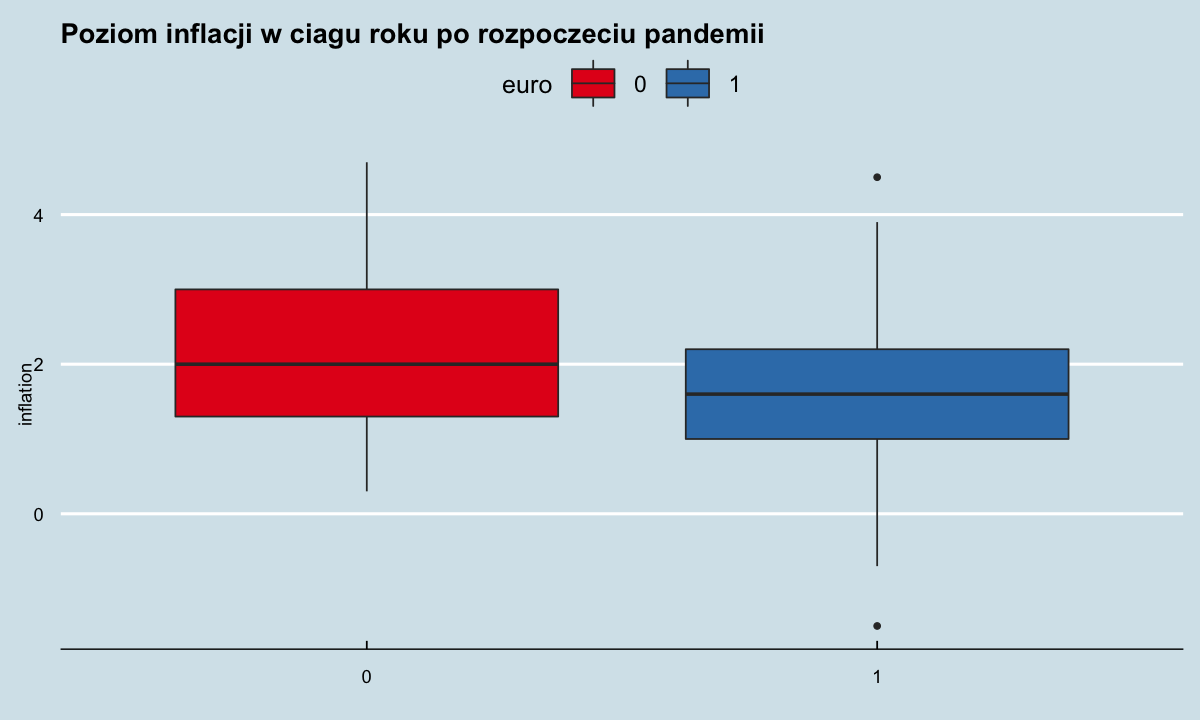

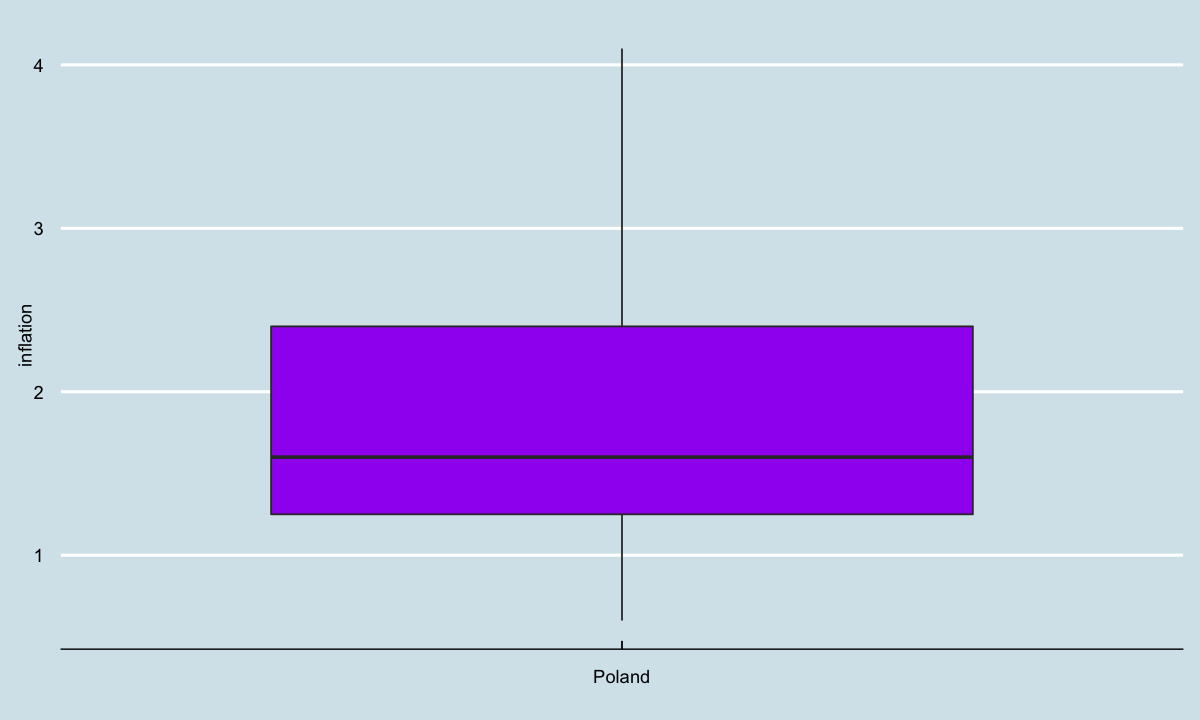

In [558]:
options(repr.plot.width=10, repr.plot.height=6)
 pre_pandemic_inf |> 
  ggplot(aes(euro, inflation, fill = euro)) +
  geom_boxplot() +
  xlab("") + ylab("inflation") + 
ggtitle("Poziom inflacji w ciagu roku po rozpoczeciu pandemii") + 
theme_economist() + scale_fill_brewer(palette="Set1") + 
theme(legend.position = "top", legend.key.size = unit(1.2, "cm"), legend.title = element_text(size=15))

  pre_pandemic_inf |> filter(country == "Poland") |>
  ggplot(aes(country, inflation)) +
  geom_boxplot(fill = 'purple') +
  xlab("") + ylab("inflation") + 
theme_economist()

In [559]:
a <- year_pandemic_inf |> filter(euro == 0) |> summary()
a[,3]

"Min.   :-0.700  " "1st Qu.: 0.400  " "Median : 1.300  " "Mean   : 1.623  " 
                                                         
"3rd Qu.: 2.900  " "Max.   : 4.400  "                 NA

In [560]:
a <- year_pandemic_inf |> filter(euro == 1) |> summary()
a[,3]

"Min.   :-2.90000  " "1st Qu.:-0.70000  " "Median : 0.10000  " 
                                                               
"Mean   : 0.06802  " "3rd Qu.: 0.90000  " "Max.   : 2.50000  " 
                     
                  NA

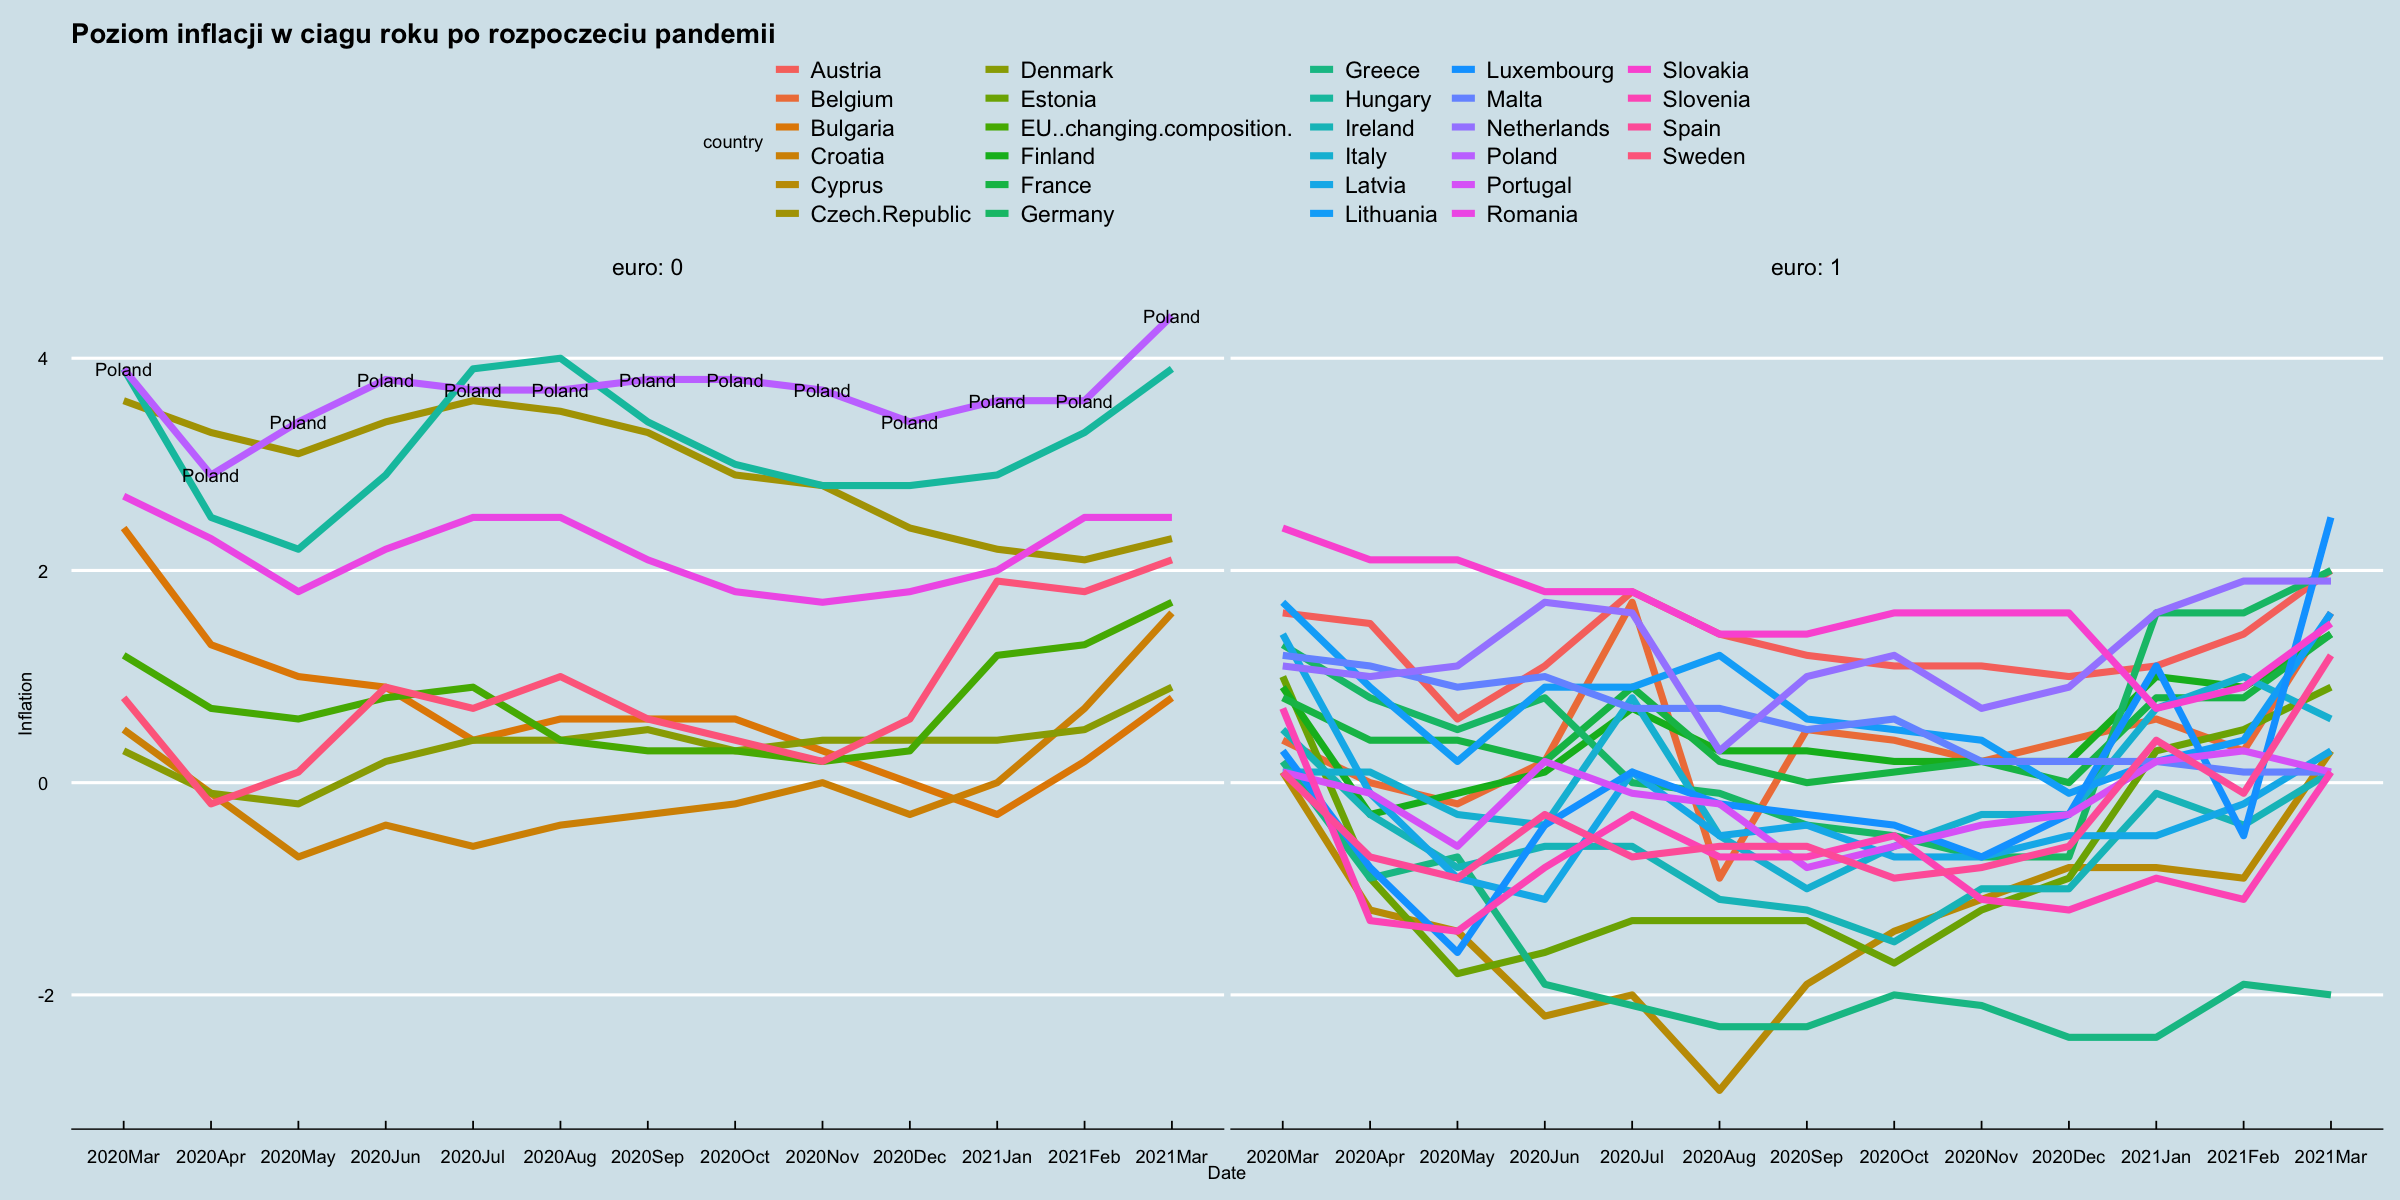

In [561]:
options(repr.plot.width=20, repr.plot.height=10)
year_pandemic_inf |> 
ggplot(aes(Date,
           inflation,
           group = country, label=country)) + 
geom_line(aes(color = country), size=2) + geom_text(data=subset(year_pandemic_inf,
                                                                country == "Poland"),
                                                    aes(label=country), check_overlap = TRUE) +
facet_grid(. ~ euro, labeller = label_both) +
xlab("Date") + ylab("Inflation") + 
ggtitle("Poziom inflacji w ciagu roku po rozpoczeciu pandemii") + theme_economist()

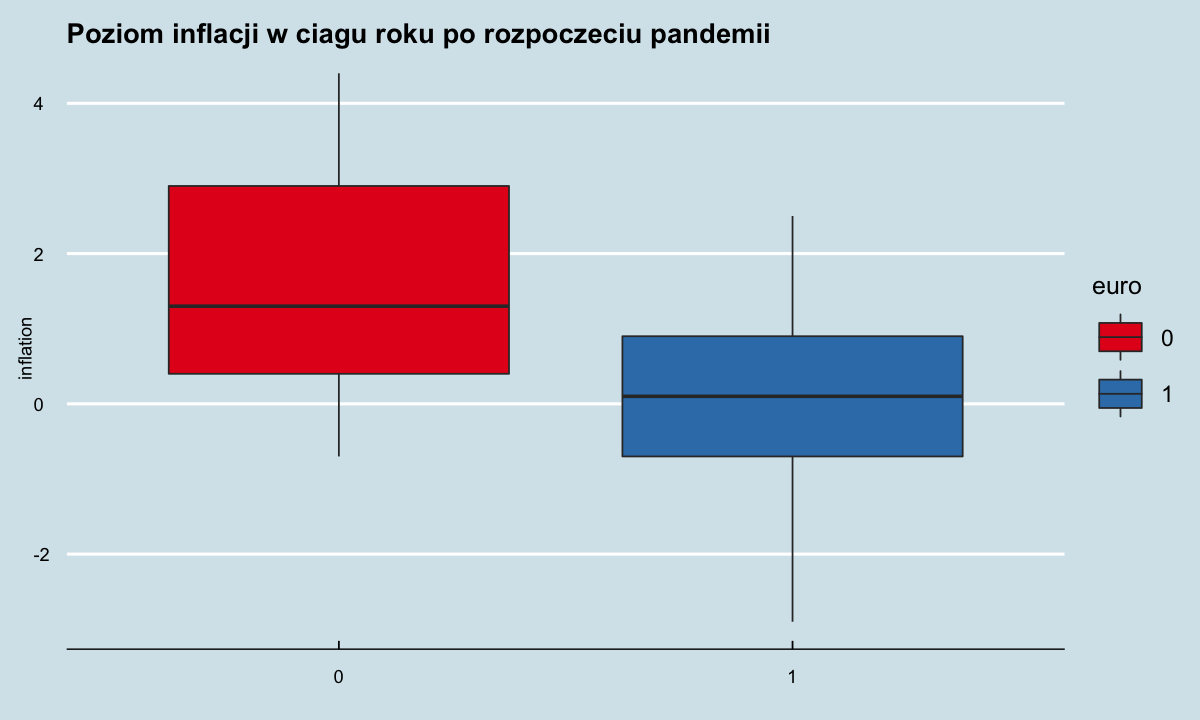

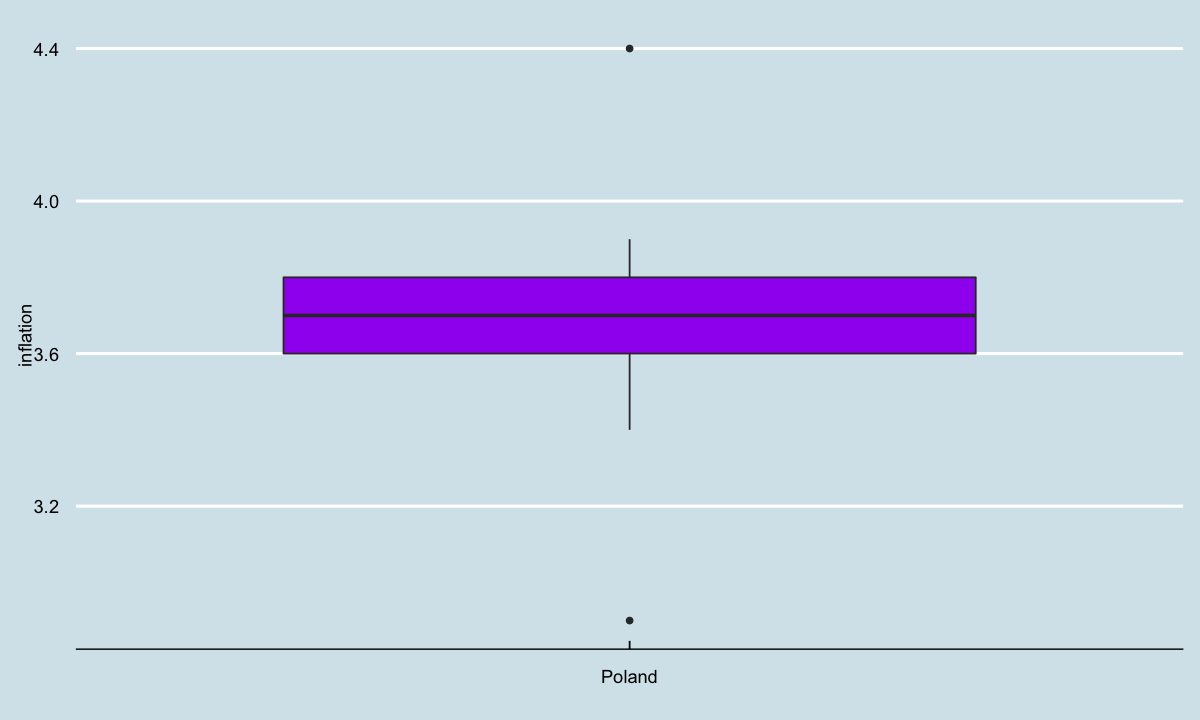

In [562]:
options(repr.plot.width=10, repr.plot.height=6)
year_pandemic_inf |> 
  ggplot(aes(euro, inflation, fill = euro)) +
  geom_boxplot() +
  xlab("") + ylab("inflation") + 
ggtitle("Poziom inflacji w ciagu roku po rozpoczeciu pandemii") + 
theme_economist() + scale_fill_brewer(palette="Set1") + 
theme(legend.position = "right", legend.key.size = unit(1.2, "cm"), legend.title = element_text(size=15))
year_pandemic_inf |> filter(country == "Poland") |>
  ggplot(aes(country, inflation)) +
  geom_boxplot(fill = 'purple') +
  xlab("") + ylab("inflation") + 
theme_economist()

In [563]:
a <- pre_attack_inf |> filter(euro == 0) |> summary()
a[,3]

"Min.   : 0.800  " "1st Qu.: 2.500  " "Median : 4.400  " "Mean   : 4.649  " 
                                                         
"3rd Qu.: 6.300  " "Max.   :11.900  "                 NA

In [564]:
a <- pre_attack_inf |> filter(euro == 1) |> summary()
a[,3]

"Min.   :-2.000  " "1st Qu.: 2.000  " "Median : 3.400  " "Mean   : 3.986  " 
                                                         
"3rd Qu.: 5.450  " "Max.   :15.600  "                 NA

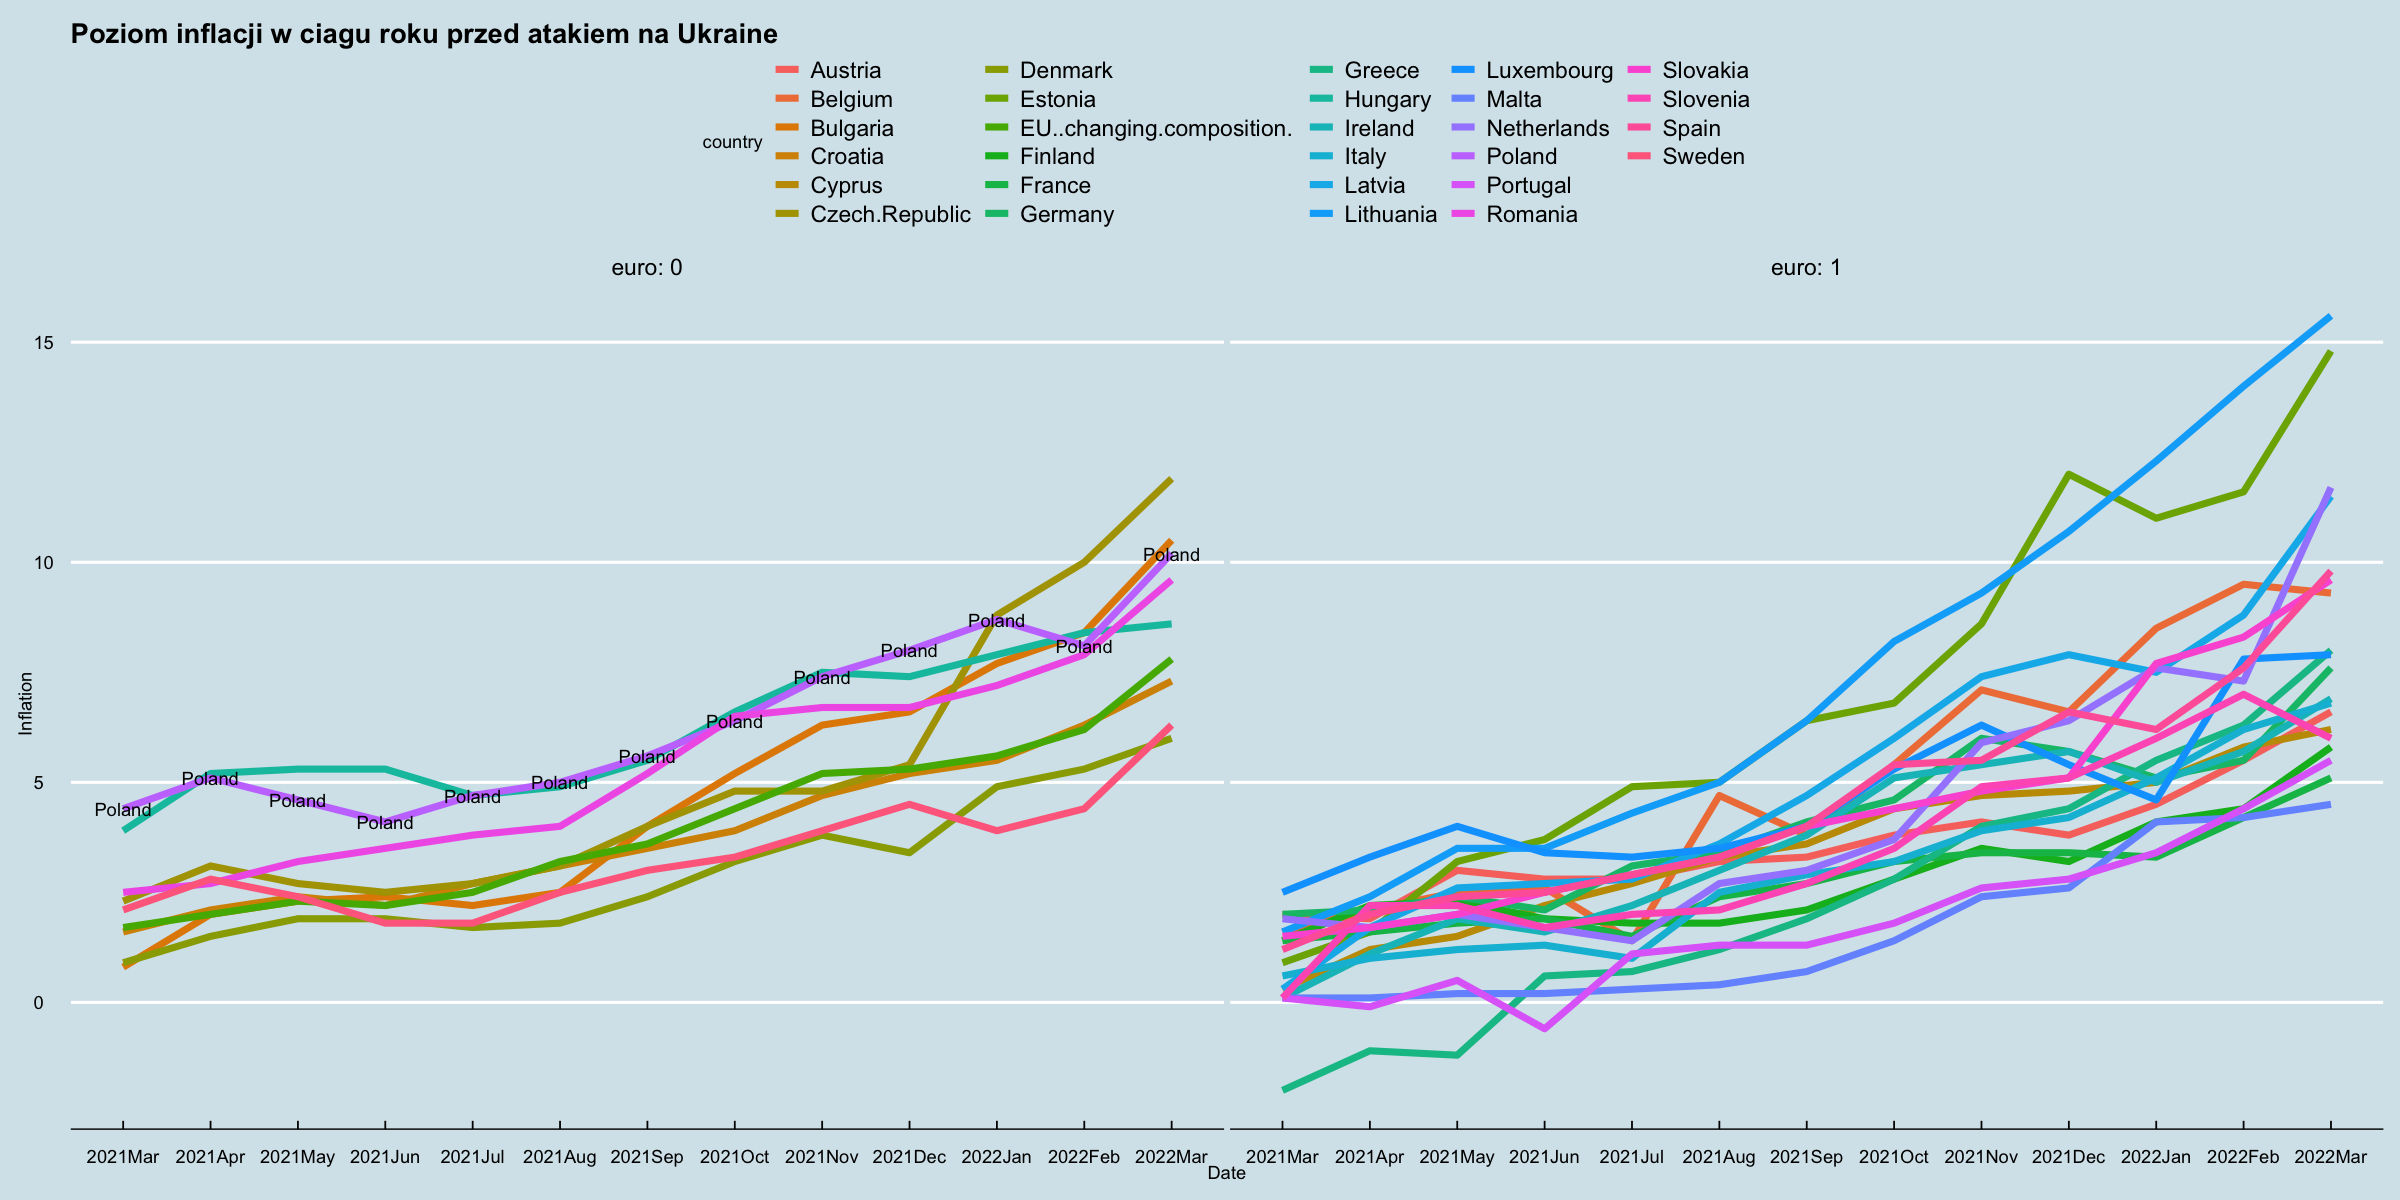

In [565]:
options(repr.plot.width=20, repr.plot.height=10)
pre_attack_inf |> 
ggplot(aes(Date,
           inflation,
           group = country)) + 
geom_line(aes(color = country), size=2) + geom_text(data=subset(pre_attack_inf,
                                                                country == "Poland"),
                                                    aes(label=country), check_overlap = TRUE) +
facet_grid(. ~ euro, labeller = label_both) + 
xlab("Date") + ylab("Inflation") + 
ggtitle("Poziom inflacji w ciagu roku przed atakiem na Ukraine") + theme_economist()

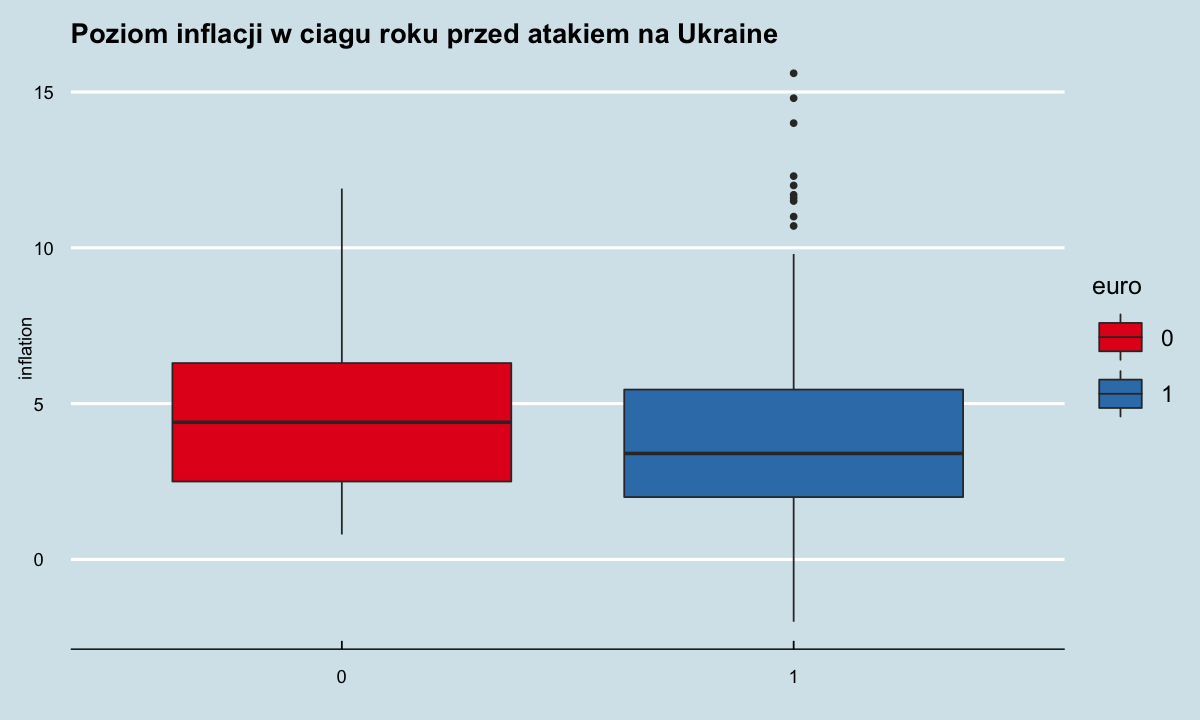

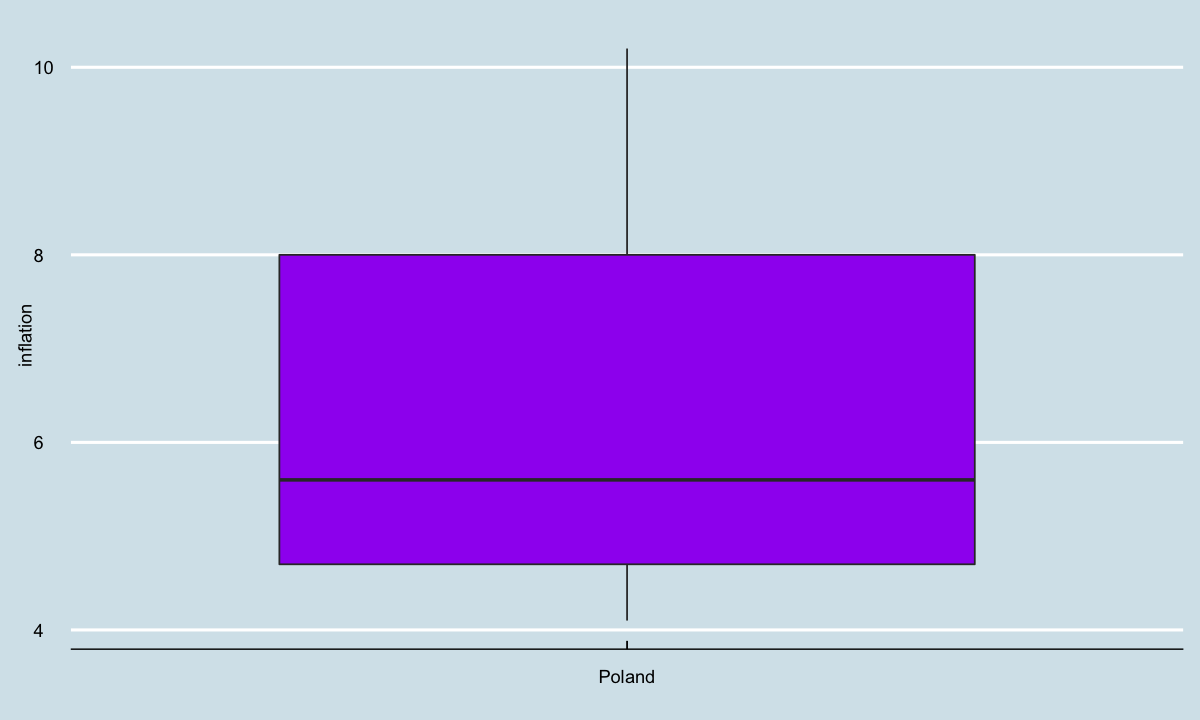

In [566]:
options(repr.plot.width=10, repr.plot.height=6)
pre_attack_inf |> 
  ggplot(aes(euro, inflation, fill = euro)) +
  geom_boxplot() +
  xlab("") + ylab("inflation") + 
ggtitle("Poziom inflacji w ciagu roku przed atakiem na Ukraine") +
theme_economist() + scale_fill_brewer(palette="Set1") +
theme(legend.position = "right", legend.key.size = unit(1.2, "cm"), legend.title = element_text(size=15))
pre_attack_inf |> filter(country == "Poland") |>
  ggplot(aes(country, inflation)) +
  geom_boxplot(fill = 'purple') +
  xlab("") + ylab("inflation") + 
theme_economist()

In [567]:
a <- after_attack_inf |> filter(euro == 0) |> summary()
a[,3]

"Min.   : 6.00  " "1st Qu.: 9.60  " "Median :11.70  " "Mean   :11.78  " 
                                                      
"3rd Qu.:13.80  " "Max.   :20.70  "                NA

In [568]:
a <- after_attack_inf |> filter(euro == 1) |> summary()
a[,3]

"Min.   : 4.50  " "1st Qu.: 7.90  " "Median : 9.30  " "Mean   :10.63  " 
                                                      
"3rd Qu.:11.50  " "Max.   :25.20  "                NA

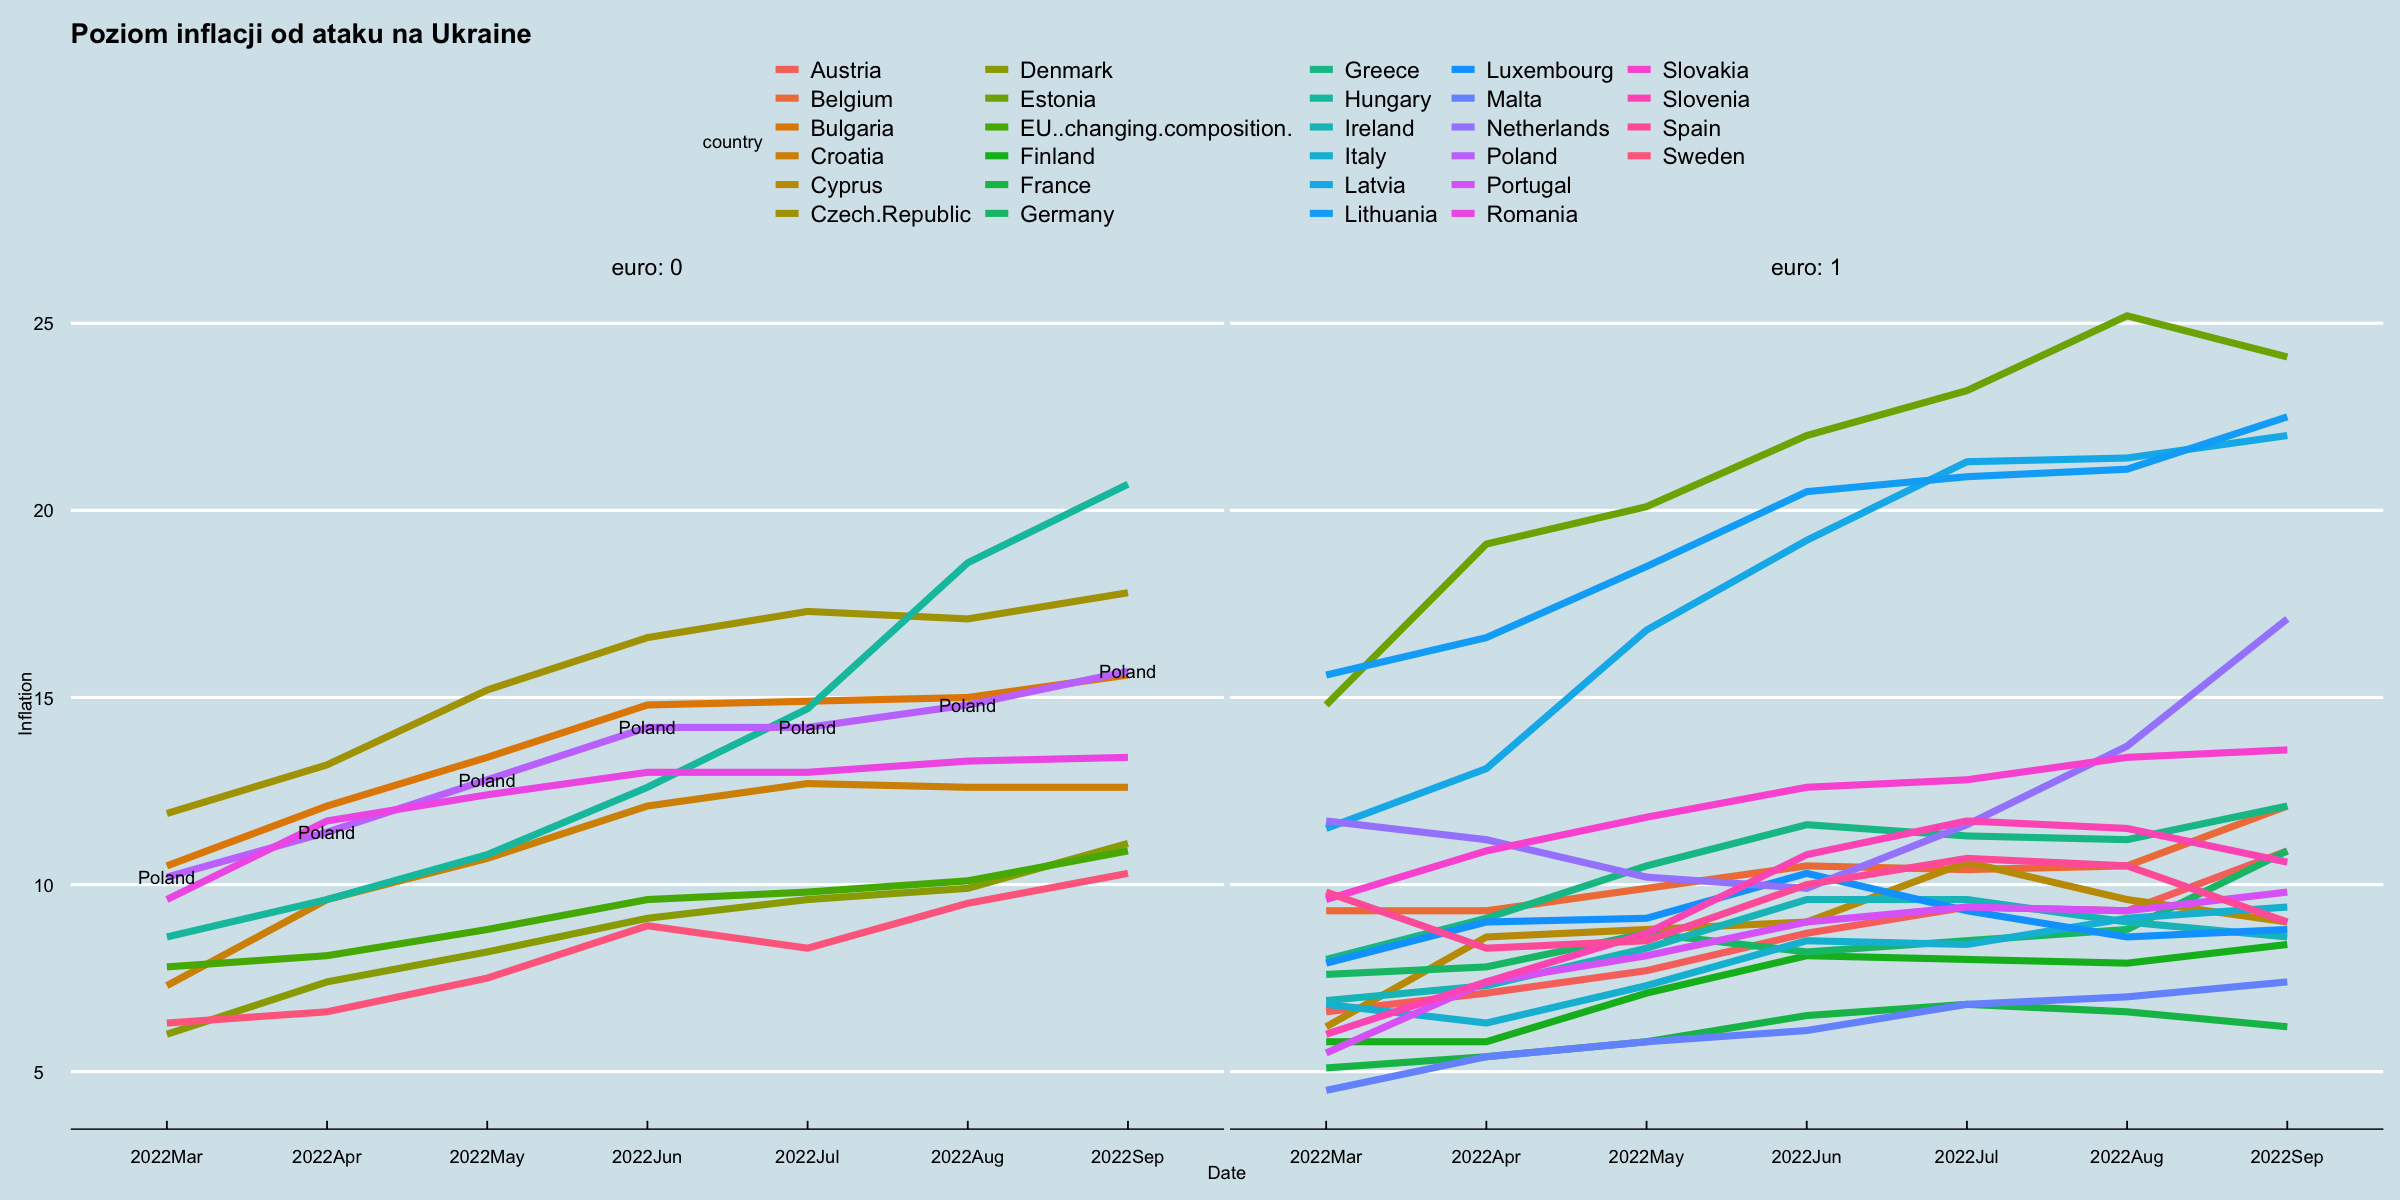

In [569]:
options(repr.plot.width=20, repr.plot.height=10)
after_attack_inf |> 
ggplot(aes(Date,
           inflation,
           group = country)) + 
geom_line(aes(color = country), size=2) + geom_text(data=subset(after_attack_inf,
                                                                country == "Poland"),
                                                    aes(label=country), check_overlap = TRUE) +
facet_grid(. ~ euro, labeller = label_both) + 
xlab("Date") + ylab("Inflation") + 
ggtitle("Poziom inflacji od ataku na Ukraine") + theme_economist()

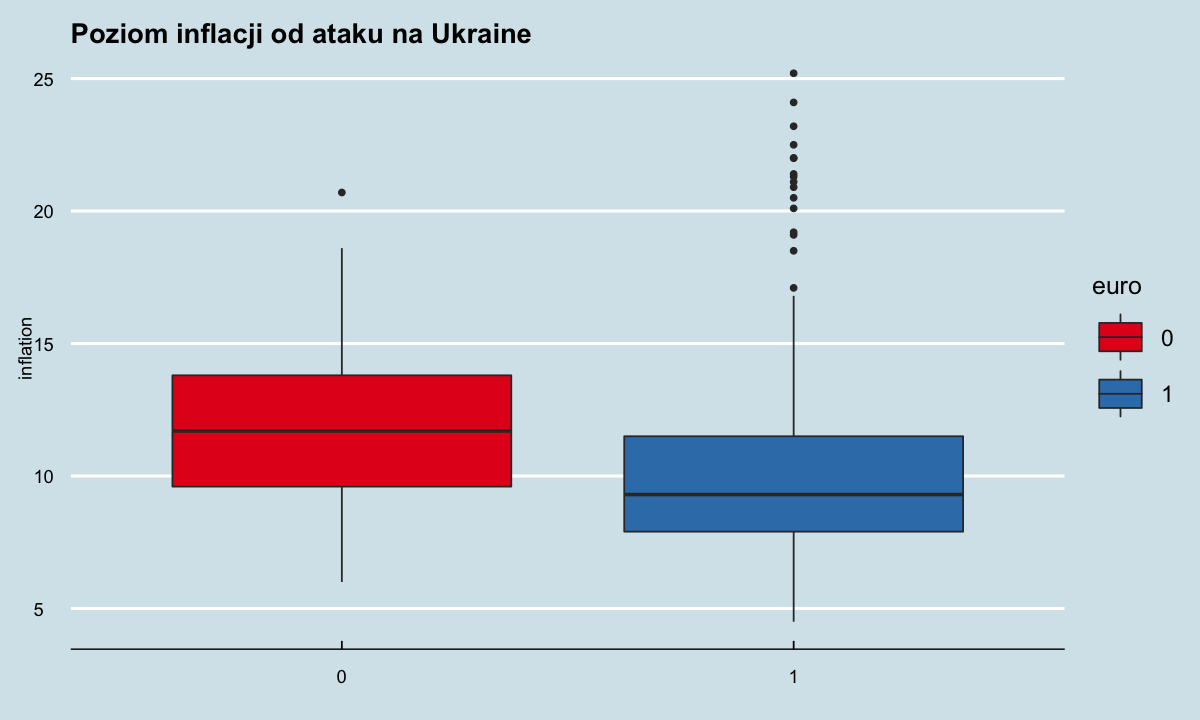

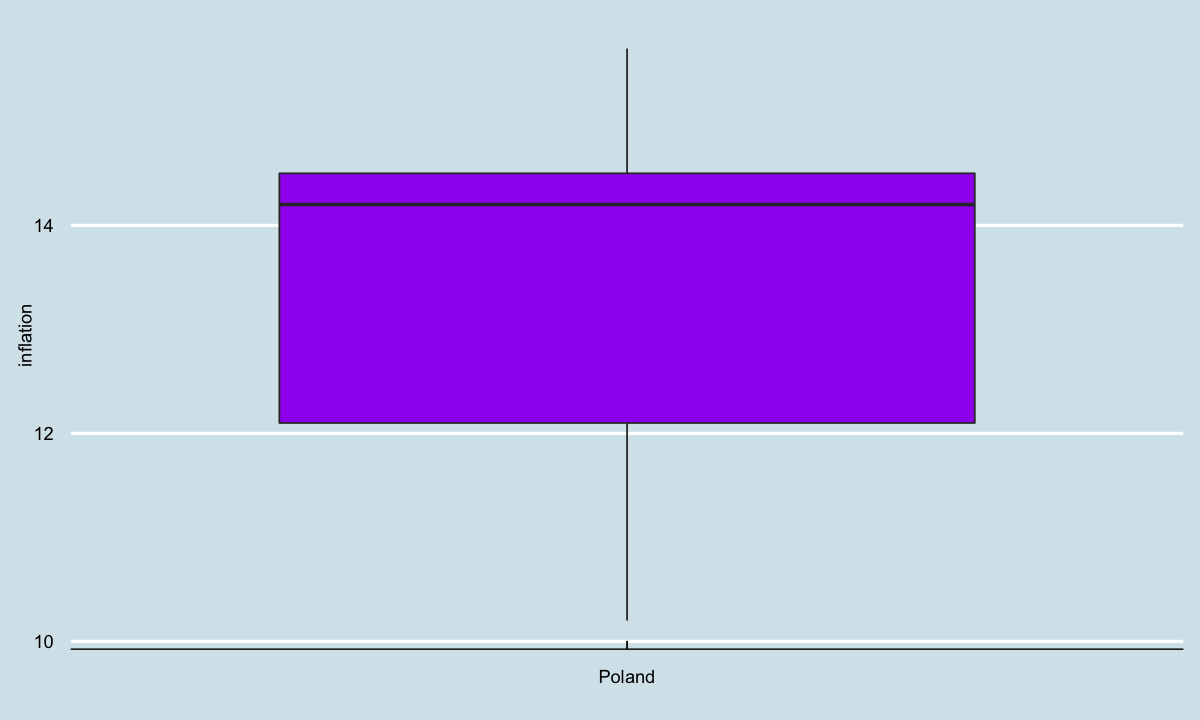

In [570]:
options(repr.plot.width=10, repr.plot.height=6)
after_attack_inf |> 
  ggplot(aes(euro, inflation, fill = euro)) +
  geom_boxplot() +
  xlab("") + ylab("inflation") +
ggtitle("Poziom inflacji od ataku na Ukraine") +
theme_economist() + scale_fill_brewer(palette="Set1") + 
theme(legend.position = "right", legend.key.size = unit(1.2, "cm"), legend.title = element_text(size=15))
after_attack_inf |> filter(country == "Poland") |>
  ggplot(aes(country, inflation)) +
  geom_boxplot(fill = 'purple') +
  xlab("") + ylab("inflation") + 
theme_economist()

# Depozyty

In [596]:
eu_deposits_data <- eu_deposits_data|> mutate(country = as.factor(country))

In [597]:
#split data into time intervals
n = sum(eu_inflation$Date == pandemic)
pre_pandemic_dep<- eu_deposits_data[which(eu_deposits_data$Date == "2018Jan")[n]:which(eu_deposits_data$Date == pandemic)[1], ]
year_pandemic_dep <- eu_deposits_data[which(eu_deposits_data$Date == pandemic)[n]:which(eu_deposits_data$Date == year_pandemic)[1], ]
pre_attack_dep <- eu_deposits_data[which(eu_deposits_data$Date == year_pandemic)[n]:which(eu_deposits_data$Date == attack_on_ukraine)[1], ]
after_attack_dep <- eu_deposits_data[which(eu_deposits_data$Date == attack_on_ukraine)[n]:which(eu_deposits_data$Date == now)[1], ]

In [598]:
pre_pandemic_inf <- pre_pandemic_inf |> filter(as.character(country) != "EU..changing.composition." )
year_pandemic_inf <- year_pandemic_inf |> filter(as.character(country) != "EU..changing.composition." )
pre_attack_inf <- pre_attack_inf |> filter(as.character(country) != "EU..changing.composition." )
after_attack_inf <- after_attack_inf |> filter(as.character(country) != "EU..changing.composition." )

In [599]:
pre_pandemic_dep <- pre_pandemic_dep |> drop_na() |> mutate(inflation = pre_pandemic_inf[-c(1,2,3),]$inflation)
year_pandemic_dep <- year_pandemic_dep |> drop_na() |> mutate(inflation = year_pandemic_inf[-c(1,2,3),]$inflation)
pre_attack_dep <- pre_attack_dep |> drop_na() |> mutate(inflation = pre_attack_inf[-c(1,2,3),]$inflation)
after_attack_dep <- after_attack_dep |> drop_na() |> mutate(inflation = after_attack_inf[-c(1,2,3, 176),]$inflation)

In [601]:
pre_pandemic_dep <- pre_pandemic_dep |> mutate(Date = factor(Date, levels = unique(Date)), deposits = as.numeric(deposits))
year_pandemic_dep <- year_pandemic_dep |> mutate(Date = factor(Date, levels = unique(Date)), deposits = as.numeric(deposits))
pre_attack_dep <- pre_attack_dep |> mutate(Date = factor(Date, levels = unique(Date)), deposits = as.numeric(deposits))
after_attack_dep <- after_attack_dep |> mutate(Date = factor(Date, levels = unique(Date)), deposits = as.numeric(deposits))

In [602]:
pre_pandemic_dep

Date,country,deposits,inflation
<fct>,<fct>,<dbl>,<dbl>
2018Jan,Romania..Romanian.leu,0.90,3.4
2018Jan,Portugal..Euro,0.17,1.1
2018Jan,Poland..Polish.zloty,1.58,1.6
2018Jan,Netherlands..Euro,1.21,1.5
2018Jan,Malta..Euro,0.78,1.2
2018Jan,Latvia..Euro,0.55,2.0
2018Jan,Luxembourg..Euro,0.05,1.3
2018Jan,Lithuania..Euro,0.21,3.6
2018Jan,Italy..Euro,0.70,1.2
